## Machine learning model for absenteeism db

In [197]:
import pandas as pd
import numpy as np

Importing the data

In [198]:
data_prep = pd.read_csv('absenteeism_db.csv')

In [199]:
data_prep

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0,8
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2,3
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0,8
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0,2


We will use every column, and the regression itself will indicate us which weights have more influence on the absenteeism time in hours, and which variables are important for the analysis and which aren't.

For this particular problem, we will use logistic regression and classify people in: moderately absent, excessively absent.
We need to choose a reference value for when a person is excessively absent. Let's plot the absenteeism column.

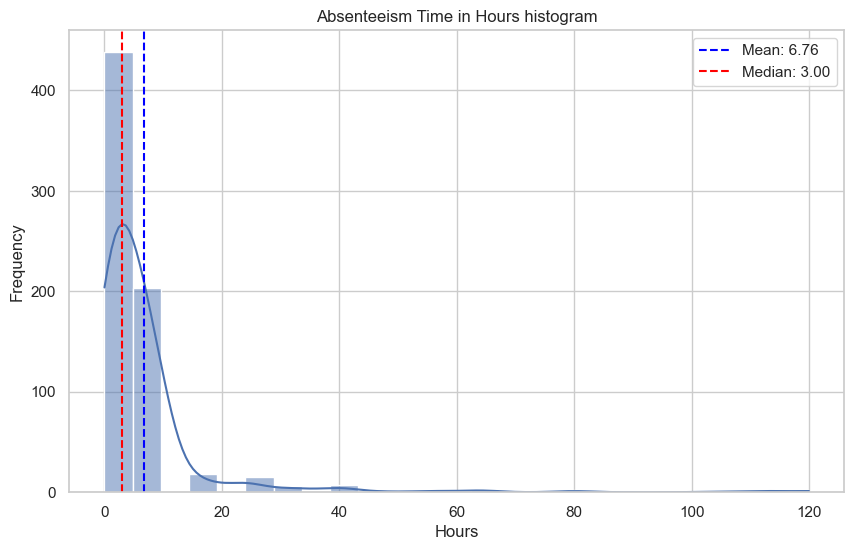

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.histplot(data=data_prep, x='Absenteeism Time in Hours', bins=25, kde=True)  # 'kde' adds an estimation of density
plt.title("Absenteeism Time in Hours histogram")  # Título del gráfico
plt.xlabel("Hours")
plt.ylabel("Frequency") 

mean = data_prep['Absenteeism Time in Hours'].mean()
median = data_prep['Absenteeism Time in Hours'].median()
plt.axvline(mean, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='red', linestyle='dashed', linewidth=1.5, label=f'Median: {median:.2f}')
plt.legend()

plt.show()

We should use the median, as this is clearly skewed. Median: 3.00 hours

### Creating the targets

In [201]:
targets = np.where(data_prep['Absenteeism Time in Hours'] > median, 1, 0)
targets # np.array containing only 1 an 0

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [202]:
data_prep['Excessive Absenteeism'] = targets
data_prep.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


We used the median and by doing that we indirectly balanced the dataset, giving us roughly 50% ones and 50% zeros on our targets column, this will prevent our model predicting all 1 or all 0 and thinking it's correct.

For logistic regression 45-55% on 1s and 0s is enough. Let's check that. 

In [203]:
ones = data_prep['Excessive Absenteeism'].value_counts()[0]
zeros = data_prep['Excessive Absenteeism'].value_counts()[1]
print(f'Total: {ones+zeros}\nOnes: {100*ones/(ones+zeros):.2f}%')

Total: 700
Ones: 54.43%


Great, let's continue.

In [204]:
data_with_targets = data_prep.drop(['Absenteeism Time in Hours'], axis = 1)
data_with_targets.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


### Selecting inputs for the regression

In [205]:
data_with_targets.shape

(700, 15)

In [206]:
data_with_targets.iloc[:,:-1] # selecting every column and every row except for the last column (targets)

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,2,179,22,40,237.656,22,1,2,0
696,1,0,0,0,5,2,225,26,28,237.656,24,0,1,2
697,1,0,0,0,5,3,330,16,28,237.656,25,1,0,0
698,0,0,0,1,5,3,235,16,32,237.656,25,1,0,0


In [207]:
unscaled_inputs = data_with_targets.iloc[:,:-1]

In [208]:
unscaled_inputs.columns

Index(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Month Value',
       'Day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets'],
      dtype='object')

### Scaling the inputs
Why is this necessary?
Because the variables are all of a different magnitude, and if we don't standardize them in some way, some might end up having a bigger weight on the model just because of the magnitude, thus giving us wrong information about the relationship between the inputs and the target.

In [209]:
columns_to_scale = ['Month Value', 'Day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children',
       'Pets']

In [210]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns, copy = True, with_mean = True, with_std = True):
        self.scaler = StandardScaler(copy = copy, with_mean = with_mean, with_std = with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]
absenteeism_scaler = CustomScaler(columns_to_scale) # create an empty standardscaler object

In [211]:
absenteeism_scaler.fit(unscaled_inputs) # this calculates everything from every feature and stores it in the absenteeism_scaler object

In [212]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs) # this transforms the unscaled inputs to scaled ones, using the information from absenteeism_scaler
# It just does this: (X - mean) / std
print(scaled_inputs)
print(scaled_inputs.shape)

     Reason 1  Reason 2  Reason 3  Reason 4  Month Value  Day of the week  \
0           0         0         0         1     0.182726        -0.683704   
1           0         0         0         0     0.182726        -0.683704   
2           0         0         0         1     0.182726        -0.007725   
3           1         0         0         0     0.182726         0.668253   
4           0         0         0         1     0.182726         0.668253   
..        ...       ...       ...       ...          ...              ...   
695         1         0         0         0    -0.388293        -0.007725   
696         1         0         0         0    -0.388293        -0.007725   
697         1         0         0         0    -0.388293         0.668253   
698         0         0         0         1    -0.388293         0.668253   
699         0         0         0         1    -0.388293         0.668253   

     Transportation Expense  Distance to Work       Age  \
0               

In [213]:
scaled_inputs.shape

(700, 14)

We got 14 features and 700 observations!

### Splitting the data
Training / Testing
We will also shuffle it as to remove any unwanted relationships when splitting the data.

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
train_test_split(scaled_inputs, targets)

[     Reason 1  Reason 2  Reason 3  Reason 4  Month Value  Day of the week  \
 438         0         0         0         1    -0.388293        -1.359682   
 380         0         0         0         1    -1.244823        -1.359682   
 561         1         0         0         0     1.610276         0.668253   
 131         0         0         0         1    -1.530333        -0.007725   
 443         0         0         0         1    -0.102784        -0.683704   
 ..        ...       ...       ...       ...          ...              ...   
 24          0         0         1         0     0.468236        -1.359682   
 166         0         0         0         1    -0.959313        -1.359682   
 167         1         0         0         0    -0.959313        -0.683704   
 597         0         0         0         1    -1.244823        -0.007725   
 587         1         0         0         0    -1.244823        -0.007725   
 
      Transportation Expense  Distance to Work       Age  \
 4

This outputs 4 arrays:
- ARRAY 1 > INPUT training dataset -> x_train
- ARRAY 2 > INPUT testing dataset -> x_test
- ARRAY 3 > TARGET training dataset -> y_train
- ARRAY 4 > TARGET testing dataset -> y_test

In [216]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, train_size = 0.8, random_state = 30) # shuffle = True by default!

In [217]:
print(x_train.shape, y_train.shape) # 80%
print(x_test.shape, y_test.shape) # 20%

(560, 14) (560,)
(140, 14) (140,)


# Logistic regression with SKLearn
### Training the model

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [219]:
reg = LogisticRegression()

In [220]:
reg.fit(x_train, y_train)

LogisticRegression()

In [221]:
print(reg.score(x_train, y_train))

0.7625


### Manually checking the accuracy
First let's do it for the x_train dataset

In [222]:
model_outputs = reg.predict(x_train)
model_outputs

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [223]:
model_outputs == y_train

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True, False,

In [224]:
print(f'Accuracy of the model: {np.sum((model_outputs==y_train))/model_outputs.shape[0]*100:.2f}% | SCORE')

Accuracy of the model: 76.25% | SCORE


### Exploring the coefficients

We need to see the coefficients to interpret this model and use it everywhere else (SQL and Tableau)

In [225]:
reg.intercept_

array([-1.73768373])

In [226]:
reg.coef_

array([[ 2.78592269,  0.58757726,  3.12607695,  1.01794227,  0.01289311,
        -0.20456826,  0.60904358,  0.01365115, -0.22815137, -0.02238778,
         0.21625643,  0.00933817,  0.41540368, -0.34606026]])

In [227]:
unscaled_inputs.columns.values

array(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Month Value',
       'Day of the week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [228]:
coef_df = pd.DataFrame(columns = ['Feature'], data = unscaled_inputs.columns.values)
coef_df['Coefficient'] = reg.coef_.T

intercept_df = pd.DataFrame(columns = ['Feature'], data = ['Intercept'])
intercept_df['Coefficient'] = reg.intercept_

coef_df = pd.concat([intercept_df, coef_df])
coef_df

,Feature,Coefficient
0,Intercept,-1.737684
0,Reason 1,2.785923
1,Reason 2,0.587577
2,Reason 3,3.126077
3,Reason 4,1.017942
4,Month Value,0.012893
5,Day of the week,-0.204568
6,Transportation Expense,0.609044
7,Distance to Work,0.013651
8,Age,-0.228151


These weights all come from values that have been previously standardized, so we can compare them 1 to 1

These coefficient (in the case of a logistic regression) are predicting the log(odds)
log(odds) = intercept + b1x1 + b2x2 + ... + b14x14

Let's see the exponential of those coefficients and check the odds ratio

In [229]:
coef_df['Odds_ratio'] = np.exp(coef_df.Coefficient)
coef_df.sort_values('Odds_ratio', ascending=False)

,Feature,Coefficient,Odds_ratio
2,Reason 3,3.126077,22.784419
0,Reason 1,2.785923,16.214772
3,Reason 4,1.017942,2.767494
6,Transportation Expense,0.609044,1.838672
1,Reason 2,0.587577,1.799623
12,Children,0.415404,1.514982
10,Body Mass Index,0.216256,1.241421
7,Distance to Work,0.013651,1.013745
4,Month Value,0.012893,1.012977
11,Education,0.009338,1.009382


The features at the top are the most important or relevant ones.
We multiply the odds * odds ratio
So if the odds_ratio is 1, nothing changes.
We have some weights like that: Distance to work, Month value.

-> Closer to 1 = less impact (on predicting power)

They may not necessarily be useless, but given all features, these seem to be the ones that make no difference.

### Interpretations
#### Reasons
We created the model assuming that Reason 0 = no reason (that's the base of the model)
That being said, remember that
- Reason 1: various diseases
- Reason 2: pregnancy and giving birth
- Reason 3: poisoning
- Reason 4: light diseases

Interpretation: The odds of someone being excessively abscent after being poisoned, are almost 20 times higher than when no reason is given.
The odds of someone being excessively abscent for pregnancy reasons, is only 1.5 times higher than when no reason is given.

#### Transportation expense
Our most important non dummy feature (2.208257). It is standardized. So for 1 std increase in transportation expense, the odds of being excessively abscent are more than 2 times higher. It's kind of hard to interpret due to standardization!

#### Distance to work, Month value
I would consider removing variables with coefficients close to 1 when conducting logistic regression due to their potential lack of significant impact on the response variable. Coefficients near 1 might suggest that the variable has minimal influence on the outcome. However, the decision to eliminate variables should be made cautiously, as it depends on various factors including context, statistical significance, and practical relevance. In the current analysis, I have chosen to retain these variables despite their coefficients being close to 1, as I'm uncertain about their true impact and want to avoid potentially overlooking valuable insights.

A reason for dropping them anyway, would be because a simpler model is always better, but in a real case scenario I would consult with my coworkers or manager.

# Testing the model

In [231]:
# With the training data: Accuracy of the model: 76.25% | SCORE
reg.score(x_test, y_test)

0.8285714285714286

82.85% - I guess we got lucky

In [232]:
predicted_proba = reg.predict_proba(x_test)
predicted_proba

array([[0.09065641, 0.90934359],
       [0.79831228, 0.20168772],
       [0.71818836, 0.28181164],
       [0.74938904, 0.25061096],
       [0.85277815, 0.14722185],
       [0.68945961, 0.31054039],
       [0.62603829, 0.37396171],
       [0.77692103, 0.22307897],
       [0.80899965, 0.19100035],
       [0.18594155, 0.81405845],
       [0.3859065 , 0.6140935 ],
       [0.12966389, 0.87033611],
       [0.07063159, 0.92936841],
       [0.69793635, 0.30206365],
       [0.65295599, 0.34704401],
       [0.68945961, 0.31054039],
       [0.37584799, 0.62415201],
       [0.62798854, 0.37201146],
       [0.38467612, 0.61532388],
       [0.7681077 , 0.2318923 ],
       [0.68758638, 0.31241362],
       [0.62629588, 0.37370412],
       [0.77773319, 0.22226681],
       [0.14997447, 0.85002553],
       [0.7977453 , 0.2022547 ],
       [0.82373139, 0.17626861],
       [0.74712586, 0.25287414],
       [0.80155514, 0.19844486],
       [0.3826353 , 0.6173647 ],
       [0.80155514, 0.19844486],
       [0.

In [233]:
predicted_proba.shape

(140, 2)

In [234]:
predicted_proba[:,1]

array([0.90934359, 0.20168772, 0.28181164, 0.25061096, 0.14722185,
       0.31054039, 0.37396171, 0.22307897, 0.19100035, 0.81405845,
       0.6140935 , 0.87033611, 0.92936841, 0.30206365, 0.34704401,
       0.31054039, 0.62415201, 0.37201146, 0.61532388, 0.2318923 ,
       0.31241362, 0.37370412, 0.22226681, 0.85002553, 0.2022547 ,
       0.17626861, 0.25287414, 0.19844486, 0.6173647 , 0.19844486,
       0.24731337, 0.11510253, 0.23858136, 0.20253752, 0.80803527,
       0.51413538, 0.83471601, 0.94170383, 0.45049159, 0.72568802,
       0.22180949, 0.31620039, 0.19734029, 0.3009227 , 0.35663196,
       0.15910315, 0.22016285, 0.12525039, 0.67248303, 0.84488661,
       0.27178152, 0.61050955, 0.94512572, 0.55484063, 0.37174103,
       0.76967875, 0.30857827, 0.69459433, 0.28990737, 0.2882959 ,
       0.87509674, 0.67998662, 0.32749957, 0.26020888, 0.22397308,
       0.67345744, 0.24481981, 0.75341441, 0.37841736, 0.5559863 ,
       0.78554515, 0.30257475, 0.66875371, 0.22126304, 0.31054

- Let's save the model
- Create our own module for this model
- Get new data, classify it, pass it through SQL, and analyze it in Tableau

In [236]:
# The information is in the reg object
# Let's use Pickle

### Saving the model

In [237]:
import pickle

In [238]:
with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [239]:
# We must save the absenteeism scaler too
with open('scaler', 'wb') as file:
    pickle.dump(absenteeism_scaler, file)